In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
log_clf=LogisticRegression(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(random_state=42)

In [31]:
voting_clf=VotingClassifier(
                estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
                voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [32]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/Users/jacky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
log_clf_soft=LogisticRegression(random_state=42)
rnd_clf_soft=RandomForestClassifier(random_state=42)
svm_clf_soft=SVC(probability=True,random_state=42)
voting_clf_soft=VotingClassifier(
                estimators=[('lr',log_clf_soft),('rf',rnd_clf_soft),('svc',svm_clf_soft)],
                voting='soft')
voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [34]:
for clf in (log_clf_soft,rnd_clf_soft,svm_clf_soft,voting_clf_soft):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


/Users/jacky/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
bag_clf=BaggingClassifier(
            DecisionTreeClassifier(),n_estimators=500,
            max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [37]:
make_moons??

In [38]:
BaggingClassifier??

In [39]:
bag_clf=BaggingClassifier(
            DecisionTreeClassifier(),n_estimators=500,
            bootstrap=True,n_jobs=-1,oob_score=True)

In [40]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.896

In [41]:
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.896

In [42]:
bag_clf.oob_decision_function_

array([[0.32022472, 0.67977528],
       [0.36312849, 0.63687151],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.05729167, 0.94270833],
       [0.36649215, 0.63350785],
       [0.        , 1.        ],
       [0.99479167, 0.00520833],
       [0.96354167, 0.03645833],
       [0.79891304, 0.20108696],
       [0.        , 1.        ],
       [0.74594595, 0.25405405],
       [0.77456647, 0.22543353],
       [0.94117647, 0.05882353],
       [0.03723404, 0.96276596],
       [0.        , 1.        ],
       [0.99479167, 0.00520833],
       [0.91935484, 0.08064516],
       [0.99465241, 0.00534759],
       [0.015     , 0.985     ],
       [0.36410256, 0.63589744],
       [0.91709845, 0.08290155],
       [1.        , 0.        ],
       [0.9742268 , 0.0257732 ],
       [0.        , 1.        ],
       [0.99441341, 0.00558659],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61325967, 0.38674033],
       [0.

In [43]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
bag_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['cool','yes'],  
                         class_names='shit',)  
graph = pydotplus.graph_from_dot_data(dot_data)  


In [45]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [46]:
import matplotlib.pyplot as plt

In [47]:
!pip install GraphViz

In [50]:
Image(data=graph.create_jpg())

InvocationException: GraphViz's executables not found

In [49]:
!conda install graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/jacky/anaconda3

  added / updated specs: 
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       he60d9cb_2         1.2 MB
    pixman-0.34.0              |       hca0a616_3         597 KB
    pango-1.41.0               |       h3bae10e_0         533 KB
    fontconfig-2.12.6          |       h9850fc5_0         250 KB
    harfbuzz-1.7.6             |       h171471c_1         665 KB
    graphviz-2.40.1            |       h0a44026_0         6.7 MB
    graphite2-1.3.11           |       h2098e52_2         100 KB
    conda-4.5.9                |           py36_0         1.0 MB
    ------------------------------------------------------------
                                           Total:        11.1 MB

The following NEW packages will be INSTALLED:

    cairo:      1.14

In [51]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rd=rnd_clf.predict(X_test)

In [57]:
bag_clf=BaggingClassifier(
            DecisionTreeClassifier(splitter='random',max_leaf_nodes=16),
            n_estimators=500,max_samples=1,bootstrap=True,n_jobs=-1)

In [59]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.0956510408833508
sepal width (cm) 0.02208750030951453
petal length (cm) 0.4528634074370998
petal width (cm) 0.4293980513700354


In [61]:
data=rnd_clf.feature_importances_

(-0.5, 1.5, 1.5, -0.5)

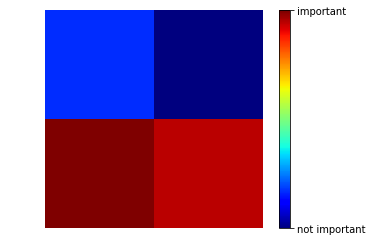

In [73]:
plt.imshow(data.reshape(2,2),cmap = plt.cm.jet)
cbar=plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['not important','important'])
plt.axis('off')

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1),n_estimators=200,
            algorithm='SAMME.R',learning_rate=0.5)

In [76]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [78]:
accuracy_score(y_test,ada_clf.predict(X_test))

0.896

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
import numpy as np
X_new = np.array([[0.8]])

In [86]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

In [89]:
y3

array([ 0.08691406, -0.0774321 ,  0.0015625 , -0.0774321 , -0.0774321 ,
        0.0015625 ,  0.08691406, -0.0774321 , -0.0774321 ,  0.0015625 ,
       -0.71209239, -0.71209239,  0.0015625 , -0.0774321 ,  0.0015625 ,
        0.0015625 ,  0.28790761, -0.0774321 ,  0.0015625 ,  0.08691406,
        0.28790761, -0.00426136,  0.28790761,  0.08691406, -0.0774321 ,
       -0.00426136,  0.28790761, -0.0774321 , -0.0774321 ,  0.0015625 ,
        0.28790761,  0.08691406,  0.28790761, -0.0774321 , -0.0774321 ,
        0.0015625 ,  0.0015625 , -0.0774321 , -0.0774321 , -0.0774321 ,
        0.0015625 , -0.0774321 , -0.00426136,  0.14728261, -0.71209239,
       -0.0774321 , -0.71209239, -0.0774321 ,  0.0015625 , -0.71209239,
       -0.0774321 , -0.0774321 , -0.0774321 ,  0.08691406, -0.0774321 ,
       -0.0774321 , -0.0774321 , -0.71209239, -0.0774321 , -0.0774321 ,
        0.28790761,  0.28790761,  0.08691406,  0.08691406, -0.0774321 ,
       -0.0774321 ,  0.28790761, -0.0774321 ,  0.14728261,  0.00

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [92]:
BaggingClassifier??

In [93]:
GradientBoostingRegressor??

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [95]:
x_train,x_val,y_train,y_val=train_test_split(X,y)
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=120)
gbrt.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [97]:
#找到最佳的optimal tree數量
errors=[mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators=np.argmin(errors)
gbrt_best=GradientBoostingRegressor(max_depth=2,
                                    n_estimators=bst_n_estimators)
gbrt_best.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=97, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [99]:
Predict regression target at each stage for X